<a href="https://colab.research.google.com/github/DestonSJU/AI/blob/main/Extra_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installs**
First I install and load the required packages.

In [1]:
#Install required packages
install.packages('GA')
install.packages('ggplot2')
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [2]:
#Load required libraries
library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




## **Function Setup**
Next I set up the function that will be used for the genetic algorithm. To do this I use α, β and γ to weight the f1(x), f2(x), and f3(x) functions respectively and then add them together in order to get 1 f(x). I initially give all functions an equal weight of (1/3). I then set up the x1, x2, x3, x4, x5 parameters.

In [3]:
#Create α, β, and γ variables
alpha <- 1/3
beta <- 1/3
gamma <- 1/3

#Create α, β, and γ variables
#Create the f(x) = α*f1(x) + β*f2(x) + γ*f3(x) function
#f1(x) = 1640.2823 + 2.3573285 * x1 + 2.3220035 * x2 + 4.5688768 * x3 + 7.7213633 * x4 + 4.4559504 * x5
#f2(x) = 6.5856 + 1.15 * x1 - 1.0427 * x2 + 0.9738 * x3 + 0.8364 * x4 - 0.3695 * x1 * x4 + 0.0861 * x1 * x5
#        + 0.3628 * x2 * x4 - 0.1106 * x1 * x1 - 0.3437 * x3 * x3 + 0.1764 * x4 * x4
#f3(x) = -0.0551 + 0.0181 * x1 + 0.1024 * x2 + 0.0421 * x3 - 0.0073 * x1 * x2 + 0.024 * x2 * x3 - 0.0118 * x2 * x4
#        - 0.0204 * x3 * x4 - 0.008 * x3 * x5 - 0.0241 * x2 * x2 + 0.0109 * x4 * x4

func <- function(x1, x2, x3, x4, x5) {
   alpha * (1640.2823 + 2.3573285 * x1 + 2.3220035 * x2 + 4.5688768 * x3 + 7.7213633 * x4 + 4.4559504 * x5) +
   beta * (6.5856 + 1.15 * x1 - 1.0427 * x2 + 0.9738 * x3 + 0.8364 * x4 - 0.3695 * x1 * x4 + 0.0861 * x1 * x5
    + 0.3628 * x2 * x4 - 0.1106 * x1 * x1 - 0.3437 * x3 * x3 + 0.1764 * x4 * x4) +
   gamma * (-0.0551 + 0.0181 * x1 + 0.1024 * x2 + 0.0421 * x3 - 0.0073 * x1 * x2 + 0.024 * x2 * x3 - 0.0118 * x2 * x4
   - 0.0204 * x3 * x4 - 0.008 * x3 * x5 - 0.0241 * x2 * x2 + 0.0109 * x4 * x4)
}

In [4]:
#Set up parameters for the function
x1 <- x2 <- x3 <- x4 <- x5 <- seq(1, 3, by = 0.1)

## **GA for f1**
Looking at the algorithm that is only considering f1, the average fitness value looks like it converges to the best fitness value at around the 20th generation. The fitness value is about -1665.21 and the best solution is (1.443405, 1.061601, 1.03874, 1.206061, 1.122932).

GA | iter = 1 | Mean = -1683.852 | Best = -1665.407
GA | iter = 2 | Mean = -1681.059 | Best = -1665.407
GA | iter = 3 | Mean = -1679.327 | Best = -1665.407
GA | iter = 4 | Mean = -1676.493 | Best = -1665.407
GA | iter = 5 | Mean = -1673.549 | Best = -1665.407
GA | iter = 6 | Mean = -1672.247 | Best = -1665.407
GA | iter = 7 | Mean = -1671.256 | Best = -1665.407
GA | iter = 8 | Mean = -1669.305 | Best = -1665.407
GA | iter = 9 | Mean = -1667.690 | Best = -1665.407
GA | iter = 10 | Mean = -1666.884 | Best = -1665.238
GA | iter = 11 | Mean = -1666.490 | Best = -1665.238
GA | iter = 12 | Mean = -1666.156 | Best = -1665.238
GA | iter = 13 | Mean = -1665.976 | Best = -1665.238
GA | iter = 14 | Mean = -1665.940 | Best = -1665.238
GA | iter = 15 | Mean = -1665.753 | Best = -1665.238
GA | iter = 16 | Mean = -1665.552 | Best = -1665.238
GA | iter = 17 | Mean = -1665.425 | Best = -1665.226
GA | iter = 18 | Mean = -1665.343 | Best = -1665.226
GA | iter = 19 | Mean = -1665.321 | Best = -1665.226
GA

1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.439316,1.060008,1.038387,1.210291,1.124842
1.439316,1.060008,1.038387,1.210291,1.124842


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -1665.212 
Solution = 
           x1       x2      x3       x4       x5
[1,] 1.443405 1.061601 1.03874 1.206061 1.122932

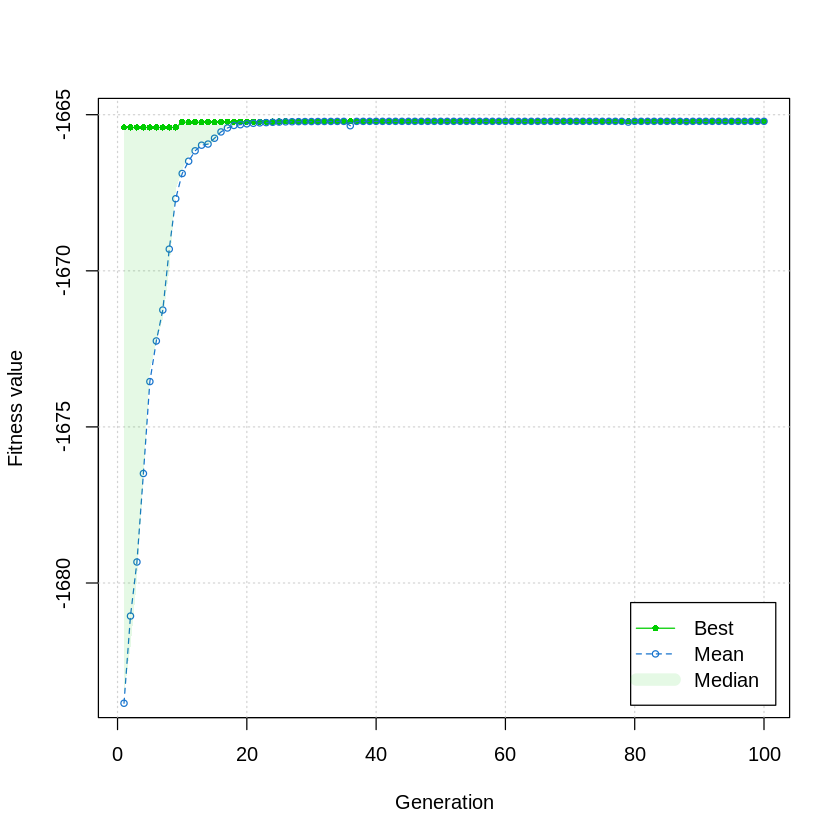

In [5]:
#Adjust α, β, and γ variables
alpha <- 1
beta <- 0
gamma <- 0

#Call the ga function to create the genetic algorithm
GA <- ga(type = "real-valued",
         fitness =  function(x) -func(x[1], x[2], x[3], x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 50, pcrossover = 0.75, pmutation = 0.001, maxiter = 100, run = 50, keepBest = TRUE, monitor = TRUE, seed = 100)

#Displays the best solution for each generation
GA@bestSol

#Displays information about the genetic algorithm
summary(GA)

#Displays the graph for the best and average fitness for each generation
plot(GA)

## **GA for f2**
Looking at the algorithm that is only considering f2, the average fitness value looks like it converges to the best fitness value at around the 25th generation which is a little bit later than the f1 algorithm at the 20th generation. The fitness value is about -7.61, which is significantly closer to 0 than f1 (-1665.21). I found the best solution to be (1.687247 2.467268 2.562197 1.12338 1.859597).

GA | iter = 1 | Mean = -9.711457 | Best = -7.811543
GA | iter = 2 | Mean = -9.345366 | Best = -7.811543
GA | iter = 3 | Mean = -9.124084 | Best = -7.741886
GA | iter = 4 | Mean = -8.863178 | Best = -7.741886
GA | iter = 5 | Mean = -8.574057 | Best = -7.741886
GA | iter = 6 | Mean = -8.434124 | Best = -7.741886
GA | iter = 7 | Mean = -8.341216 | Best = -7.741886
GA | iter = 8 | Mean = -8.129078 | Best = -7.741886
GA | iter = 9 | Mean = -7.965724 | Best = -7.741886
GA | iter = 10 | Mean = -7.886862 | Best = -7.731827
GA | iter = 11 | Mean = -7.850667 | Best = -7.630377
GA | iter = 12 | Mean = -7.815591 | Best = -7.630377
GA | iter = 13 | Mean = -7.798090 | Best = -7.630377
GA | iter = 14 | Mean = -7.787102 | Best = -7.630377
GA | iter = 15 | Mean = -7.755120 | Best = -7.630377
GA | iter = 16 | Mean = -7.723485 | Best = -7.630377
GA | iter = 17 | Mean = -7.693471 | Best = -7.630377
GA | iter = 18 | Mean = -7.667471 | Best = -7.629001
GA | iter = 19 | Mean = -7.653647 | Best = -7.629001
GA

2.388701,2.680401,2.71495,1.072191,2.910348
2.388701,2.680401,2.71495,1.072191,2.910348
1.755054,2.468548,2.499109,1.16295,1.766514
1.755054,2.468548,2.499109,1.16295,1.766514
1.755054,2.468548,2.499109,1.16295,1.766514
1.755054,2.468548,2.499109,1.16295,1.766514
1.755054,2.468548,2.499109,1.16295,1.766514
1.755054,2.468548,2.499109,1.16295,1.766514
1.755054,2.468548,2.499109,1.16295,1.766514
1.758719,2.452904,2.535212,1.166638,1.768373
1.686269,2.467673,2.546764,1.122617,1.897301


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -7.614748 
Solution = 
           x1       x2       x3      x4       x5
[1,] 1.687247 2.467268 2.562197 1.12338 1.859597

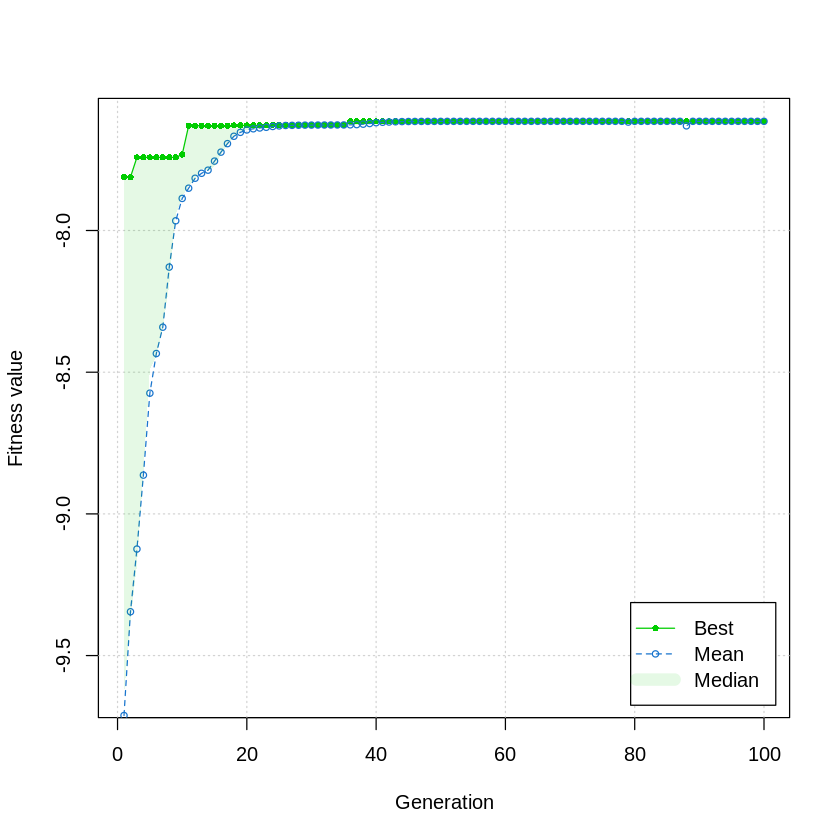

In [6]:
#Adjust α, β, and γ variables
alpha <- 0
beta <- 1
gamma <- 0

#Call the ga function to create the genetic algorithm
GA <- ga(type = "real-valued",
         fitness =  function(x) -func(x[1], x[2], x[3], x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 50, pcrossover = 0.75, pmutation = 0.001, maxiter = 100, run = 50, keepBest = TRUE, monitor = TRUE, seed = 100)

#Displays the best solution for each generation
GA@bestSol

#Displays information about the genetic algorithm
summary(GA)

#Displays the graph for the best and average fitness for each generation
plot(GA)

## **GA for f3**
Looking at the algorithm that is only considering f3, the average fitness value looks like it converges to the best fitness value at around the 30th generation which is a little bit later than the f1 algorithm at the 20th generation and f2 at the 25th. The fitness value is about -0.063 , which is closer to 0 than f2 (-7.61). I found the best solution to be (1.956719, 2.919258, 1.093089, 2.480905, 2.034206).

GA | iter = 1 | Mean = -0.11454099 | Best = -0.07035415
GA | iter = 2 | Mean = -0.10654352 | Best = -0.07035415
GA | iter = 3 | Mean = -0.10018572 | Best = -0.07035415
GA | iter = 4 | Mean = -0.09347089 | Best = -0.06763247
GA | iter = 5 | Mean = -0.09050436 | Best = -0.06763247
GA | iter = 6 | Mean = -0.08983591 | Best = -0.06763247
GA | iter = 7 | Mean = -0.08919973 | Best = -0.06763247
GA | iter = 8 | Mean = -0.08461404 | Best = -0.06763247
GA | iter = 9 | Mean = -0.08051654 | Best = -0.06763247
GA | iter = 10 | Mean = -0.07791485 | Best = -0.06701561
GA | iter = 11 | Mean = -0.07788550 | Best = -0.06701561
GA | iter = 12 | Mean = -0.07394830 | Best = -0.06553787
GA | iter = 13 | Mean = -0.07185641 | Best = -0.06553787
GA | iter = 14 | Mean = -0.07103428 | Best = -0.06553787
GA | iter = 15 | Mean = -0.06914890 | Best = -0.06489405
GA | iter = 16 | Mean = -0.06809374 | Best = -0.06489405
GA | iter = 17 | Mean = -0.06713263 | Best = -0.06447335
GA | iter = 18 | Mean = -0.06627699 | Be

1.911463,2.832813,1.053457,2.785062,1.645375
1.911463,2.832813,1.053457,2.785062,1.645375
1.911463,2.832813,1.053457,2.785062,1.645375
1.9098,2.927173,1.134031,2.390814,1.774237
1.9098,2.927173,1.134031,2.390814,1.774237
1.9098,2.927173,1.134031,2.390814,1.774237
1.9098,2.927173,1.134031,2.390814,1.774237
1.9098,2.927173,1.134031,2.390814,1.774237
1.9098,2.927173,1.134031,2.390814,1.774237
1.896584,2.916779,1.14374,2.749675,1.891617
1.896584,2.916779,1.14374,2.749675,1.891617


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -0.06328894 
Solution = 
           x1       x2       x3       x4       x5
[1,] 1.956719 2.919258 1.093089 2.480905 2.034206

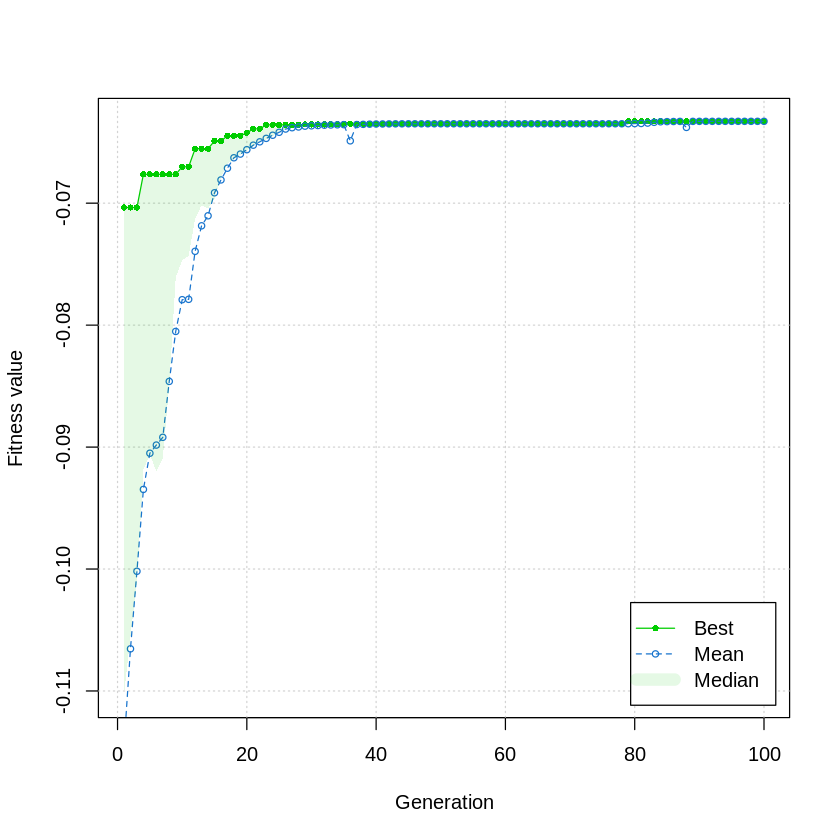

In [7]:
#Adjust α, β, and γ variables
alpha <- 0
beta <- 0
gamma <- 1

#Call the ga function to create the genetic algorithm
GA <- ga(type = "real-valued",
         fitness =  function(x) -func(x[1], x[2], x[3], x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 50, pcrossover = 0.75, pmutation = 0.001, maxiter = 100, run = 50, keepBest = TRUE, monitor = TRUE, seed = 100)

#Displays the best solution for each generation
GA@bestSol

#Displays information about the genetic algorithm
summary(GA)

#Displays the graph for the best and average fitness for each generation
plot(GA)

## **GA for Equal Weight**
Looking at the algorith that considers all 3 functions, I found that the fitness graph's average fitness value converges at around the 30th generation. This is the same as the graph for f3. This algorithm's fitness value is -558.01, which makes sense since it is around the average of the 3 fitness values that I found for the other functions. The best solution is (1.442385, 1.060225, 1.038561, 1.20309, 1.124094). This is very similar to f1's solution (1.443405, 1.061601, 1.03874, 1.206061, 1.122932).

GA | iter = 1 | Mean = -564.5592 | Best = -558.0950
GA | iter = 2 | Mean = -563.5333 | Best = -558.0950
GA | iter = 3 | Mean = -562.9168 | Best = -558.0950
GA | iter = 4 | Mean = -561.9288 | Best = -558.0950
GA | iter = 5 | Mean = -560.9121 | Best = -558.0950
GA | iter = 6 | Mean = -560.4961 | Best = -558.0950
GA | iter = 7 | Mean = -560.1332 | Best = -558.0950
GA | iter = 8 | Mean = -559.4443 | Best = -558.0950
GA | iter = 9 | Mean = -558.9428 | Best = -558.0950
GA | iter = 10 | Mean = -558.6424 | Best = -558.0314
GA | iter = 11 | Mean = -558.5172 | Best = -558.0314
GA | iter = 12 | Mean = -558.4078 | Best = -558.0314
GA | iter = 13 | Mean = -558.3417 | Best = -558.0314
GA | iter = 14 | Mean = -558.3193 | Best = -558.0314
GA | iter = 15 | Mean = -558.2466 | Best = -558.0314
GA | iter = 16 | Mean = -558.1706 | Best = -558.0314
GA | iter = 17 | Mean = -558.1174 | Best = -558.0144
GA | iter = 18 | Mean = -558.0829 | Best = -558.0144
GA | iter = 19 | Mean = -558.0645 | Best = -558.0144
GA

1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.415428,1.060291,1.039199,1.240381,1.122283
1.439316,1.060008,1.038387,1.210291,1.124842
1.439316,1.060008,1.038387,1.210291,1.124842


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2 x3 x4 x5
lower  1  1  1  1  1
upper  3  3  3  3  3

GA results: 
Iterations             = 100 
Fitness function value = -558.0124 
Solution = 
           x1       x2       x3      x4       x5
[1,] 1.442385 1.060225 1.038561 1.20309 1.124094

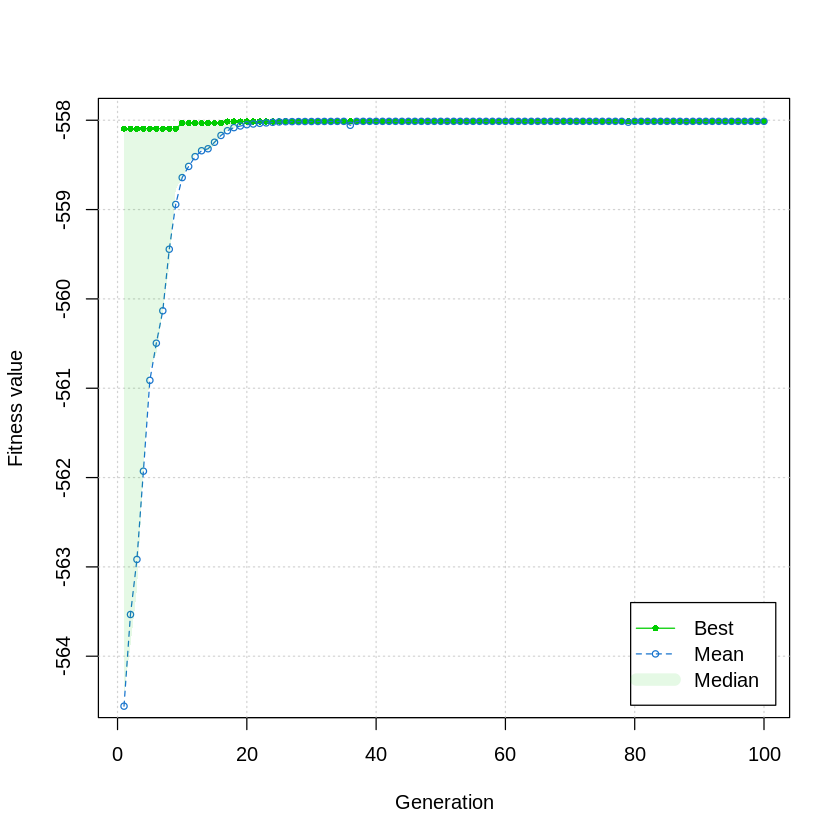

In [8]:
#Adjust α, β, and γ variables
alpha <- 1/3
beta <- 1/3
gamma <- 1/3

#Call the ga function to create the genetic algorithm
GA <- ga(type = "real-valued",
         fitness =  function(x) -func(x[1], x[2], x[3], x[4], x[5]),
         lower = c(1, 1, 1, 1, 1), upper = c(3, 3, 3, 3, 3),
         popSize = 50, pcrossover = 0.75, pmutation = 0.001, maxiter = 100, run = 50, keepBest = TRUE, monitor = TRUE, seed = 100)

#Displays the best solution for each generation
GA@bestSol

#Displays information about the genetic algorithm
summary(GA)

#Displays the graph for the best and average fitness for each generation
plot(GA)

## **Conclusion**
In conclusion, when looking at the algorithm's graphs, I found that f1's converged first at around the 20th generation, followed by f2 at 25, and f3 and equal weight at 30. Lokking at their fitness values, f1's is the furthest from 0 at -1665.21, followed by equal weight with -558.01, f2 at -7.61, and f3 at -0.063. The fitness value for equal weight makes sense since it is around the average of f1, f2, and f3's fitness values. When looking at best solutions, I found equal weight (1.442385, 1.060225, 1.038561, 1.20309, 1.124094) to be very close to f1 in terms of best solutions  (1.443405, 1.061601, 1.03874, 1.206061, 1.122932). This means that f1 is the most minimized out of the three functions when they are all weighted equally in the algorithm.